## <font color='blue'> The Sparks Foundation | @ GRIPNovember 2022 </font>

### <font color='black'> Data Science & Business Analytics Tasks </font>

TASK 2 - Prediction using unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\msair\\Downloads") # change directory

In [3]:
iris_df= pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_df.shape

(150, 6)

In [7]:
iris_df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Cleaning**

In [9]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
 #Dropping the Id Column as it is not required
iris_df.drop('Id' , axis = 1 , inplace = True) 

In [11]:
iris_df.shape

(150, 5)

In [12]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Check for duplicate data**

In [13]:
dups = iris_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
iris_df[dups]

Number of duplicate rows = 3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**Removing Duplicates**

In [14]:
iris_df.drop_duplicates(inplace=True) 

In [15]:
dups = iris_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(iris_df.shape)

Number of duplicate rows = 0
(147, 5)


**EDA**

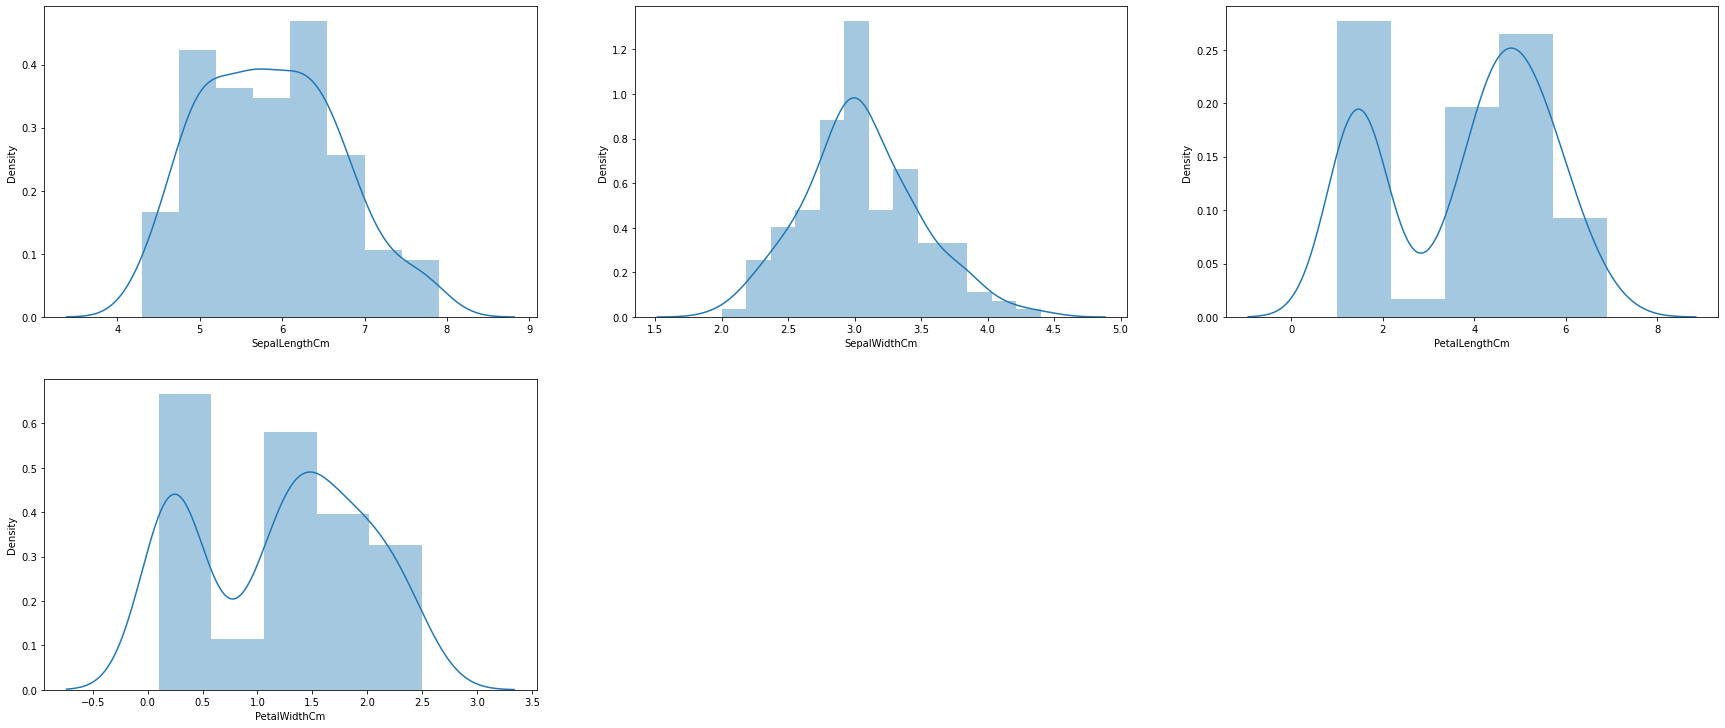

In [17]:
plt.figure(figsize = (30,40))
feature = iris_df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(iris_df[i[1]])

**Checking for Outliers**

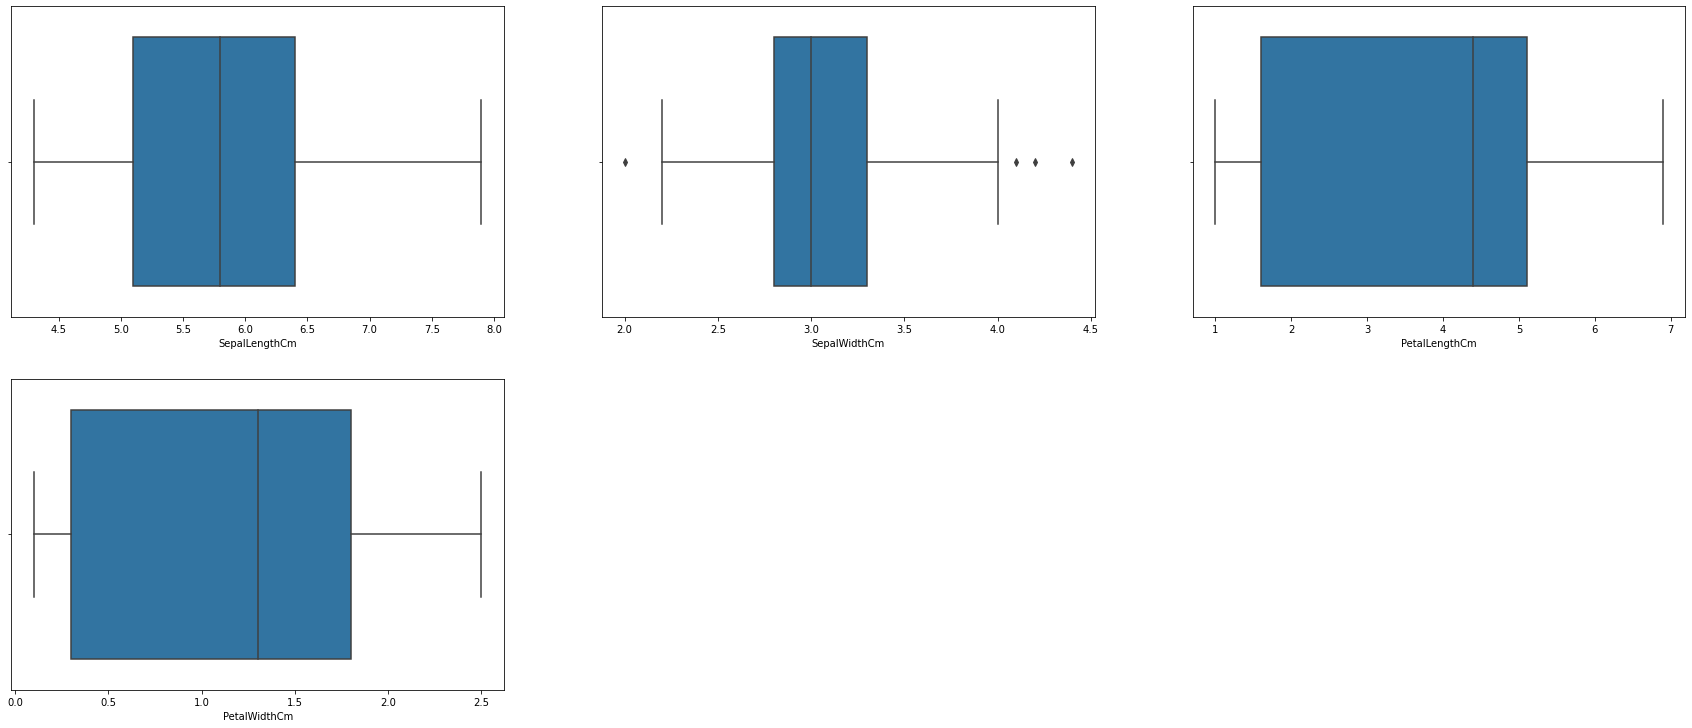

In [18]:
plt.figure(figsize = (30,40))
feature = iris_df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.boxplot(iris_df[i[1]])

In [19]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_df['SepalWidthCm'].quantile(0.25)
q3 = iris_df['SepalWidthCm'].quantile(0.75) 

In [20]:
# To find the number of rows and columns after outlier treatment
iqr = q3 - q1
iris_df = iris_df[(iris_df['SepalWidthCm'] >= q1-1.5*iqr) & (iris_df['SepalWidthCm'] <= q3+1.5*iqr)]
iris_df.shape # To find out the number of rows and columns after outlier treatment

(143, 5)

We can see that after outlier treatment the number of rows are reduced to 147 from 150

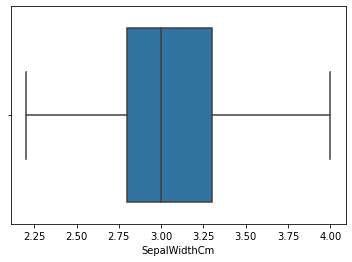

In [21]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(x = iris_df['SepalWidthCm'])
plt.show()

**Checking for Correlations**

In [92]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans4,Agglo_CLusters
SepalLengthCm,1.000000,-0.113268,0.879015,0.821715,0.788414,0.739499,0.455243
SepalWidthCm,-0.113268,1.000000,-0.396539,-0.328102,-0.394815,-0.340957,-0.683696
PetalLengthCm,0.879015,-0.396539,1.000000,0.960785,0.946668,0.797627,0.713293
PetalWidthCm,0.821715,-0.328102,0.960785,1.000000,0.954711,0.792951,0.660318
Species,0.788414,-0.394815,0.946668,0.954711,1.000000,0.770376,0.652762
Clus_kmeans4,0.739499,-0.340957,0.797627,0.792951,0.770376,1.000000,0.414840
Agglo_CLusters,0.455243,-0.683696,0.713293,0.660318,0.652762,0.414840,1.000000


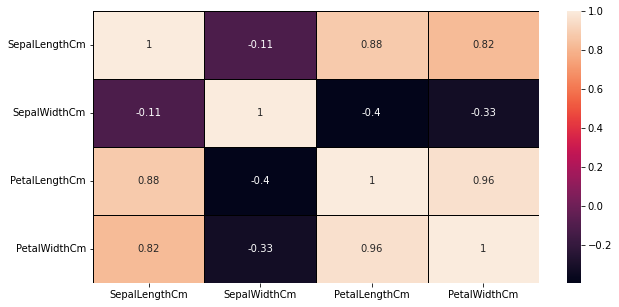

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(),annot=True,linewidth=0.5,linecolor="black");

In [23]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [24]:
for feature in iris_df.columns: 
    if iris_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(iris_df[feature].unique()))
        print(pd.Categorical(iris_df[feature].unique()).codes)
        iris_df[feature] = pd.Categorical(iris_df[feature]).codes



feature: Species
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[0 1 2]


In [25]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  143 non-null    float64
 1   SepalWidthCm   143 non-null    float64
 2   PetalLengthCm  143 non-null    float64
 3   PetalWidthCm   143 non-null    float64
 4   Species        143 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.7 KB


**Checking pairwise distribution of the continuous variables**

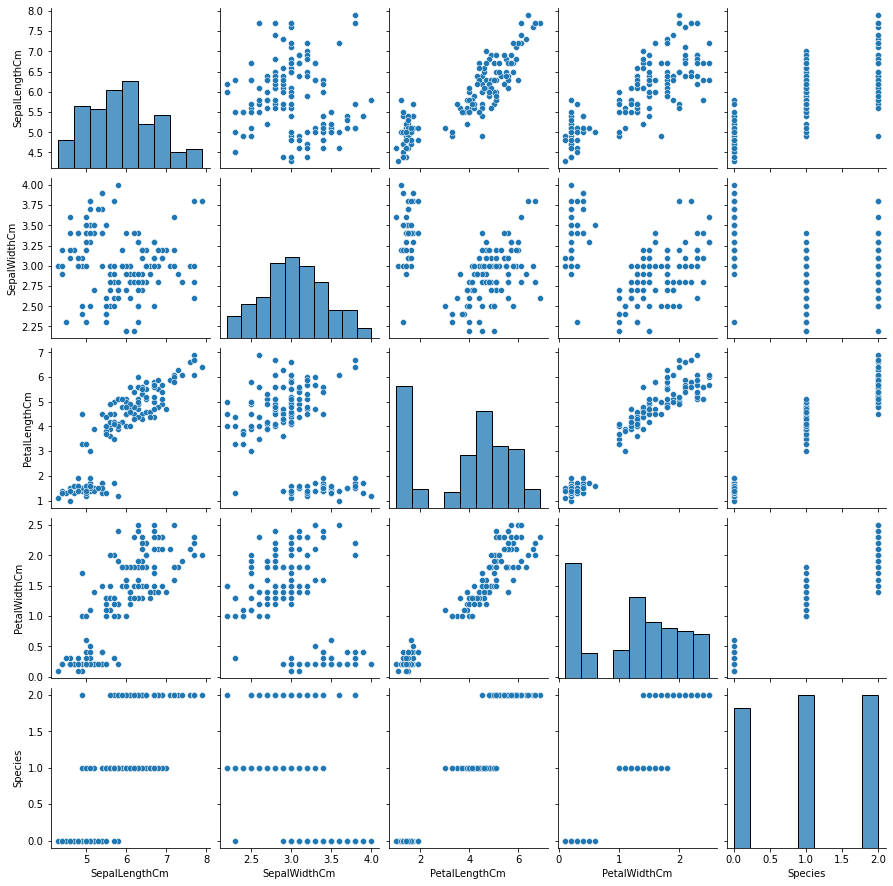

In [26]:
sns.pairplot(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]);

**Creating Clusters using KMeans**

**Forming 2 Clusters with K=2**

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
iris = scaler.fit_transform(iris_df.drop('Species' , axis = 1))
iris

array([[-0.92610339,  1.16307189, -1.39323729, -1.37089412],
       [-1.16645328, -0.09692266, -1.39323729, -1.37089412],
       [-1.40680316,  0.40707516, -1.45055401, -1.37089412],
       [-1.5269781 ,  0.15507625, -1.33592057, -1.37089412],
       [-1.04627834,  1.4150708 , -1.39323729, -1.37089412],
       [-0.56557857,  2.17106752, -1.22128712, -1.10489974],
       [-1.5269781 ,  0.91107298, -1.39323729, -1.23789693],
       [-1.04627834,  0.91107298, -1.33592057, -1.37089412],
       [-1.76732798, -0.34892157, -1.39323729, -1.37089412],
       [-1.16645328,  0.15507625, -1.33592057, -1.50389132],
       [-0.56557857,  1.66706971, -1.33592057, -1.37089412],
       [-1.28662822,  0.91107298, -1.27860384, -1.37089412],
       [-1.28662822, -0.09692266, -1.39323729, -1.50389132],
       [-1.88750293, -0.09692266, -1.56518746, -1.50389132],
       [-0.0848788 ,  2.42306643, -1.50787074, -1.37089412],
       [-0.56557857,  2.17106752, -1.45055401, -1.10489974],
       [-0.92610339,  1.

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(iris)

KMeans(n_clusters=2, random_state=1)

**Cluster Output for all the observations**


In [30]:
# Get the labels
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Within Cluster Sum of Squares**

In [31]:
k_means.inertia_

216.28097971370974

**Forming clusters with K = 1,3,4,5,6 and comparing the WSS**

In [32]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(iris)
k_means.inertia_

571.9999999999999

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(iris)
k_means.inertia_

133.09491718320885

In [34]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(iris)
k_means.inertia_

108.234427656237

In [35]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(iris)
k_means.inertia_

88.14386234336087

In [36]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(iris)
k_means.inertia_

77.20635119416777

* WSS reduces as K keeps increasing

**Calculating WSS for other values of K - Elbow Method**

In [37]:
wss =[] 

In [38]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(iris)
    wss.append(KM.inertia_)

In [39]:
wss

[571.9999999999999,
 216.28097971370974,
 133.09491718320885,
 108.234427656237,
 88.14386234336087,
 77.20635119416777,
 69.16749341693682,
 61.23726929824867,
 52.20112169938683,
 48.151075311164355]

In [40]:
a=[1,2,3,4,5,6,7,8,9,10]

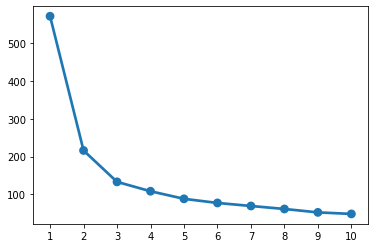

In [41]:
sns.pointplot(a, wss);

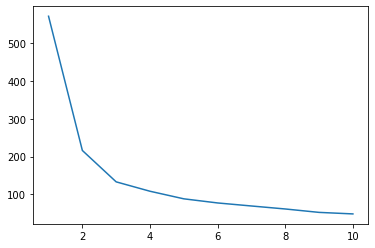

In [42]:
plt.plot(range(1,11), wss);

* We can clearly see why it is called 'The Elbow Method' from the above graph. The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every literation.

**KMeans with K=3**

In [43]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(iris)
labels = k_means.labels_

**Cluster evaluation for 3 clusters: the silhouette score**

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
# Calculating silhouette_score
silhouette_score(iris,labels,random_state=1)

0.46244579787978707

**KMeans with K=4**

In [46]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(iris)
labels = k_means.labels_

**Cluster evaluation for 4 clusters**


In [47]:
silhouette_score(iris,labels,random_state=1)

0.41657500975702366

* silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

In [56]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' ,
                max_iter = 300 , n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

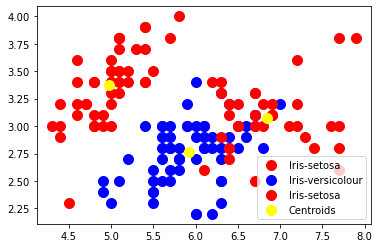

In [58]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans == 0 , 1] , 
            s = 100 , c = 'red' , label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans == 1 , 1] , 
            s = 100 , c = 'blue' , label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans == 2 , 1] , 
            s = 100 , c = 'red' , label = 'Iris-setosa')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] ,  
            s = 100 , c = 'yellow' , label = 'Centroids')

plt.legend();

**Appending Clusters to the original dataset**

In [48]:
iris_df["Clus_kmeans4"] = labels
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans4
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,3


**Cluster Profiling**

In [49]:
iris_df.Clus_kmeans4.value_counts().sort_index()

0    44
1    49
2    21
3    29
Name: Clus_kmeans4, dtype: int64

In [51]:
clust_profile=iris_df
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=iris_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,freq
Clus_kmeans4,,,,,,
0,4.990909,3.402273,1.465909,0.250000,0.000000,44
1,6.144898,2.889796,4.783673,1.610204,1.408163,49
2,5.519048,2.457143,3.842857,1.166667,1.047619,21
3,6.996552,3.158621,5.800000,2.124138,1.931034,29


In [61]:
from mpl_toolkits.mplot3d import Axes3D

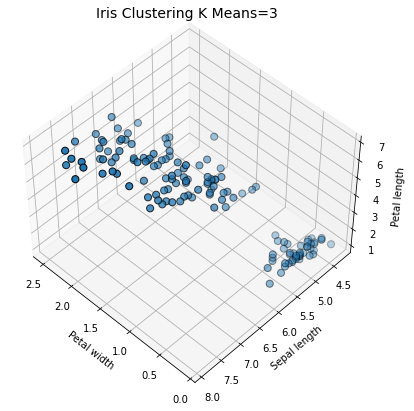

In [62]:
fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

**Creating the Dendrogram**

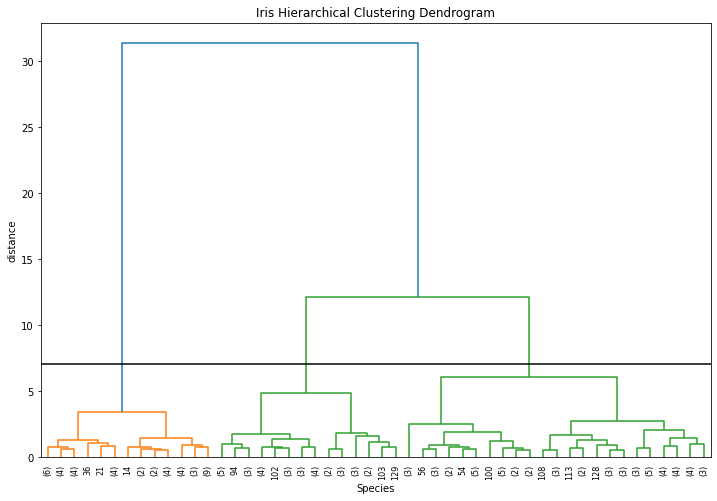

In [95]:
from scipy.cluster.hierarchy import linkage,dendrogram
#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(12,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()


In [70]:
from scipy.cluster.hierarchy import fcluster

In [72]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(hier, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [83]:
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['clusters']=iris_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,freq,clusters
Clus_kmeans4,,,,,,,
0,4.990909,3.402273,1.465909,0.250000,0.000000,44.0,44
1,6.144898,2.889796,4.783673,1.610204,1.408163,49.0,49
2,5.519048,2.457143,3.842857,1.166667,1.047619,21.0,21
3,6.996552,3.158621,5.800000,2.124138,1.931034,29.0,29


**Cluster Frequency**

In [76]:
clust_profile.clusters.value_counts().sort_index()

21    1
29    1
44    1
49    1
Name: clusters, dtype: int64

**Cluster Profiles**

In [81]:
aggdata=clust_profile.iloc[:,1:8].groupby('clusters').mean()
aggdata['clusters']=clust_profile.clusters.value_counts().sort_index()
aggdata

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,freq,clusters
clusters,,,,,,
21,2.457143,3.842857,1.166667,1.047619,21.0,1
29,3.158621,5.800000,2.124138,1.931034,29.0,1
44,3.402273,1.465909,0.250000,0.000000,44.0,1
49,2.889796,4.783673,1.610204,1.408163,49.0,1


**Using Agglomerative Clustering**

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(iris_df.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 1 2
 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 2 2 1 2]


In [88]:
iris_df["Agglo_CLusters"]=Cluster_agglo

In [89]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Clus_kmeans4', 'Agglo_CLusters'],
      dtype='object')

In [91]:
agglo_data=iris_df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=iris_df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans4,Freq
Agglo_CLusters,,,,,,,
0,4.980000,3.377778,1.462222,0.251111,0.000000,0.044444,45
1,6.996552,3.158621,5.800000,2.124138,1.931034,3.000000,29
2,5.978261,2.766667,4.547826,1.494203,1.318841,1.289855,69
